## Kütüphane ve Veri Yükleme

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

# Stil ayarları
plt.style.use("seaborn-v0_8-whitegrid")
sns.set_palette("Set2")

# Görselleri kaydedeceğimiz klasör
os.makedirs("../eda_outputs", exist_ok=True)

df = pd.read_csv("../data/all_batteries_summary.csv")

df.head()

,battery,cycle,v_mean,v_min,v_max,v_std,i_mean,i_std,t_mean,t_min,t_max,t_std,discharge_duration,delta_v,soc
0,B0005,2,3.532781,2.612467,4.191492,0.235952,-1.837360,0.568575,32.536891,24.325993,38.982181,3.496006,3690.234,1.579024,1.000000
1,B0005,4,3.542968,2.587209,4.188881,0.227256,-1.875000,0.508930,32.643595,24.685948,39.033398,3.349390,3655.672,1.601673,0.990634
2,B0005,6,3.553056,2.651917,4.188187,0.225218,-1.874182,0.510195,32.522526,24.734266,38.818797,3.361916,3631.203,1.536270,0.984003
3,B0005,8,3.545849,2.592948,4.188461,0.226101,-1.864037,0.526649,32.492083,24.654236,38.672511,3.338197,3631.563,1.595513,0.984101
4,B0005,10,3.544456,2.547420,4.188299,0.230189,-1.864576,0.526608,32.368612,24.524797,38.558828,3.354728,3588.563,1.640879,0.972449


In [2]:
# Veri kümesinin bilgisi
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 468 entries, 0 to 467
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   battery             468 non-null    object 
 1   cycle               468 non-null    int64  
 2   v_mean              468 non-null    float64
 3   v_min               468 non-null    float64
 4   v_max               468 non-null    float64
 5   v_std               468 non-null    float64
 6   i_mean              468 non-null    float64
 7   i_std               468 non-null    float64
 8   t_mean              468 non-null    float64
 9   t_min               468 non-null    float64
 10  t_max               468 non-null    float64
 11  t_std               468 non-null    float64
 12  discharge_duration  468 non-null    float64
 13  delta_v             468 non-null    float64
 14  soc                 468 non-null    float64
dtypes: float64(13), int64(1), object(1)
memory usage: 55.0+ K

### Batarya Dağılımı

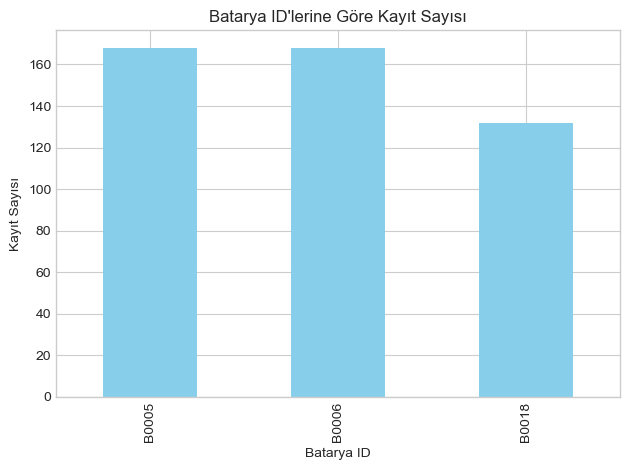

In [3]:
df["battery"].value_counts().plot(kind="bar", color="skyblue")
plt.title("Batarya ID'lerine Göre Kayıt Sayısı")
plt.xlabel("Batarya ID")
plt.ylabel("Kayıt Sayısı")
plt.tight_layout()
plt.savefig("../eda_outputs/sample_distribution_by_battery.png")
plt.show()

### Korelasyon Matrisi (Batarya Bazında)

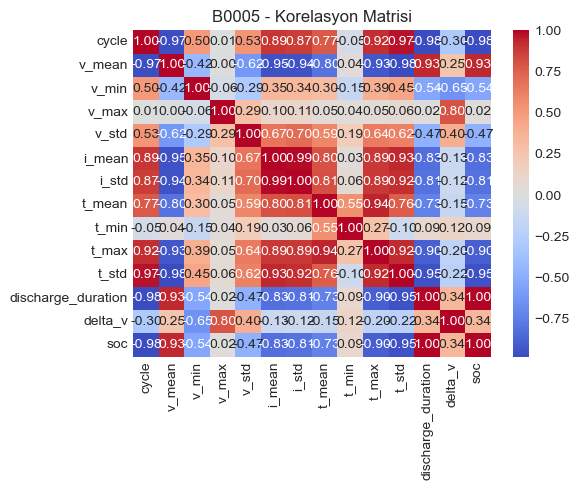

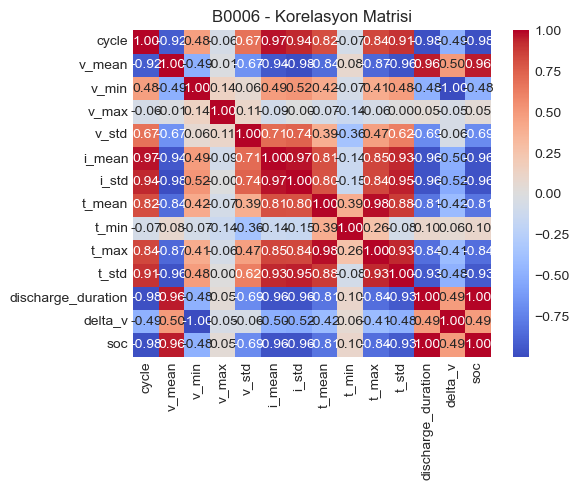

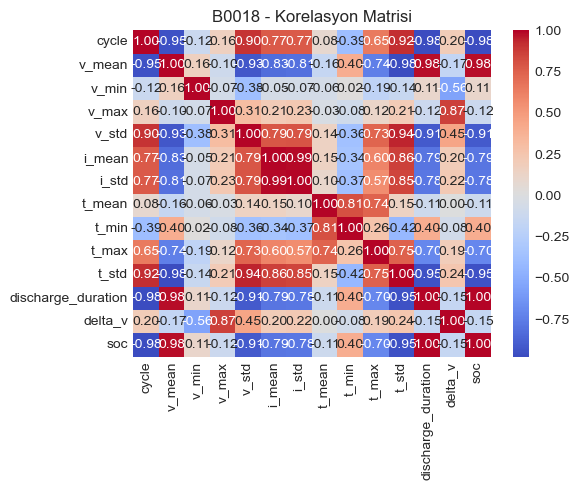

In [8]:
for battery_id in df["battery"].unique():
    subset = df[df["battery"] == battery_id]
    
    # Sadece sayısal sütunları seç
    numeric_cols = ["cycle", "v_mean", "v_min", "v_max", "v_std", 
                    "i_mean", "i_std", "t_mean", "t_min", "t_max", 
                    "t_std", "discharge_duration", "delta_v", "soc"]
    
    corr = subset[numeric_cols].corr()

    plt.figure(figsize=(6, 5))
    sns.heatmap(corr, annot=True, cmap="coolwarm", fmt=".2f")
    plt.title(f"{battery_id} - Korelasyon Matrisi")
    plt.tight_layout()
    plt.savefig(f"../eda_outputs/{battery_id}_heatmap.png")
    plt.show()


Tüm bataryalarda voltage-temperature negatif korelasyonlu çıktı.
temperature-time arasında yüksek pozitif korelasyon gözlemlendi.

### Betimsel İstatistik ve Dağılım Grafikleri

In [9]:
# Sayısal sütunlar
numeric_cols = ["time", "voltage", "current", "temperature", "capacity"]

# Batarya isimlerini al
batteries = df["battery"].unique()

# Her batarya için ayrı analiz
for battery in batteries:
    subset = df[df["battery"] == battery]

    # Temel istatistikler
    print(f"\n--- {battery} ---")
    display(subset[numeric_cols].describe().T)

    # Dağılım grafikleri
    for col in numeric_cols:
        plt.figure(figsize=(8, 4))
        sns.histplot(subset[col], kde=True, bins=40, color="skyblue")
        plt.title(f"{battery} - {col} Dağılımı")
        plt.xlabel(col)
        plt.ylabel("Frekans")
        plt.tight_layout()
        plt.savefig(f"../eda_outputs/{battery}_{col}_dist.png")
        plt.close()



--- B0005 ---


KeyError: "None of [Index(['time', 'voltage', 'current', 'temperature', 'capacity'], dtype='object')] are in the [columns]"

In [11]:
# Değişkenlerin betimsel istatistiklerini batarya bazında gruplayarak incele
summary_stats = df.groupby("battery")[["voltage", "current", "temperature", "capacity", "time"]].describe().T

summary_stats

battery                   B0005         B0006         B0018
voltage     count  50285.000000  50285.000000  34866.000000
            mean       3.515268      3.457464      3.501219
            std        0.231778      0.249892      0.250037
            min        2.455679      2.120698      2.278634
            25%        3.399384      3.321433      3.382813
            50%        3.511664      3.466565      3.497088
            75%        3.660903      3.621686      3.662815
            max        4.222920      4.222516      4.193543
current     count  50285.000000  50285.000000  34866.000000
            mean      -1.806032     -1.773513     -1.842923
            std        0.610502      0.647669      0.552445
            min       -2.029098     -2.027018     -2.026719
            25%       -2.013415     -2.011178     -2.009485
            50%       -2.012312     -2.010095     -2.008341
            75%       -2.011052     -2.008816     -2.007073
            max        0.007496      0.008809      0.014306
temperature count  50285.000000  50285.000000  34866.000000
            mean      32.816991     32.844374     31.083216
            std        3.987515      4.143796      3.649983
            min       23.214802     23.201272     22.350256
            25%       30.019392     29.653775     28.462162
            50%       32.828944     32.940629     31.121895
            75%       35.920887     36.092889     33.982822
            max       41.450232     42.007540     38.878688
capacity    count  50285.000000  50285.000000  34866.000000
            mean       1.560345      1.524719      1.584405
            std        0.182380      0.233458      0.156427
            min        1.287453      1.153818      1.341051
            25%        1.386229      1.347410      1.428376
            50%        1.538237      1.473215      1.605737
            75%        1.746871      1.729207      1.711846
            max        1.856487      2.035338      1.855005
time        count  50285.000000  50285.000000  34866.000000
            mean    1546.208924   1546.208924   1547.119848
            std      906.640295    906.640295    908.373277
            min        0.000000      0.000000      0.000000
            25%      768.563000    768.563000    763.339250
            50%     1537.031000   1537.031000   1537.289500
            75%     2305.984000   2305.984000   2312.964500
            max     3690.234000   3690.234000   3434.891000

### Her döngü için özet istatistik üretmek (min, max, mean, std, delta).

In [13]:
# Her discharge_cycle için özet istatistikler hesaplayalım
agg_features = ["voltage", "current", "temperature", "capacity", "time"]
summary_rows = []

grouped = df.groupby(["battery", "discharge_cycle"])

for (battery, cycle), group in grouped:
    row = {
        "battery": battery,
        "discharge_cycle": cycle,
        "original_cycle": group["original_cycle"].iloc[0],
        "battery_encoded": group["battery_encoded"].iloc[0],
    }
    
    for feature in agg_features:
        row[f"{feature}_min"] = group[feature].min()
        row[f"{feature}_max"] = group[feature].max()
        row[f"{feature}_mean"] = group[feature].mean()
        row[f"{feature}_std"] = group[feature].std()
        row[f"delta_{feature}"] = group[feature].max() - group[feature].min()
    
    summary_rows.append(row)

df_cycle_summary = pd.DataFrame(summary_rows)

# İlk 5 satırı kontrol edelim
df_cycle_summary.head()

,battery,discharge_cycle,original_cycle,battery_encoded,voltage_min,voltage_max,voltage_mean,voltage_std,delta_voltage,current_min,...,capacity_min,capacity_max,capacity_mean,capacity_std,delta_capacity,time_min,time_max,time_mean,time_std,delta_time
0,B0005,1,1,0,2.612467,4.191492,3.529829,0.236558,1.579024,-2.018015,...,1.856487,1.856487,1.856487,1.558272e-15,0.0,0.0,3690.234,1812.087497,1069.272600,3690.234
1,B0005,2,3,0,2.587209,4.189773,3.537320,0.235366,1.602564,-2.016821,...,1.846327,1.846327,1.846327,5.565331e-15,0.0,0.0,3672.344,1803.143372,1064.170526,3672.344
2,B0005,3,5,0,2.651917,4.188187,3.543737,0.228111,1.536270,-2.016574,...,1.835349,1.835349,1.835349,6.010636e-15,0.0,0.0,3651.641,1793.809379,1058.412389,3651.641
3,B0005,4,7,0,2.592948,4.188461,3.543666,0.233347,1.595513,-2.015936,...,1.835263,1.835263,1.835263,1.780953e-15,0.0,0.0,3631.563,1784.359428,1052.810986,3631.563
4,B0005,5,9,0,2.547420,4.188299,3.542343,0.237301,1.640879,-2.017426,...,1.834646,1.834646,1.834646,2.448810e-15,0.0,0.0,3629.172,1783.501351,1052.107062,3629.172


In [14]:
# Sadece gerekli capacity sütununu tut
df_cycle_summary = df_cycle_summary.drop(columns=["capacity_min", "capacity_max", "capacity_std", "delta_capacity"])
df_cycle_summary.to_csv("../data/3-feature_engineered/discharge_cycle_summary.csv", index=False)

df_cycle_summary.head()

,battery,discharge_cycle,original_cycle,battery_encoded,voltage_min,voltage_max,voltage_mean,voltage_std,delta_voltage,current_min,...,temperature_max,temperature_mean,temperature_std,delta_temperature,capacity_mean,time_min,time_max,time_mean,time_std,delta_time
0,B0005,1,1,0,2.612467,4.191492,3.529829,0.236558,1.579024,-2.018015,...,38.982181,32.572328,3.495804,14.656188,1.856487,0.0,3690.234,1812.087497,1069.272600,3690.234
1,B0005,2,3,0,2.587209,4.189773,3.537320,0.235366,1.602564,-2.016821,...,39.033398,32.725235,3.435509,14.347450,1.846327,0.0,3672.344,1803.143372,1064.170526,3672.344
2,B0005,3,5,0,2.651917,4.188187,3.543737,0.228111,1.536270,-2.016574,...,38.818797,32.642862,3.388174,14.084531,1.835349,0.0,3651.641,1793.809379,1058.412389,3651.641
3,B0005,4,7,0,2.592948,4.188461,3.543666,0.233347,1.595513,-2.015936,...,38.762305,32.514876,3.395306,14.110061,1.835263,0.0,3631.563,1784.359428,1052.810986,3631.563
4,B0005,5,9,0,2.547420,4.188299,3.542343,0.237301,1.640879,-2.017426,...,38.665393,32.382349,3.404667,14.146692,1.834646,0.0,3629.172,1783.501351,1052.107062,3629.172


In [15]:
df_cycle_summary.describe().T

,count,mean,std,min,25%,50%,75%,max
discharge_cycle,468.0,79.423077,46.565149,1.000000,39.750000,78.500000,117.250000,168.000000
original_cycle,468.0,256.412393,173.789009,1.000000,109.750000,234.500000,390.000000,613.000000
battery_encoded,468.0,0.923077,0.797790,0.000000,0.000000,1.000000,2.000000,2.000000
voltage_min,468.0,2.498293,0.126791,2.120698,2.406541,2.466904,2.640123,2.699983
voltage_max,468.0,4.188689,0.007549,4.157552,4.183192,4.188086,4.195744,4.222920
voltage_mean,468.0,3.491822,0.049540,3.403885,3.456647,3.494967,3.534883,3.573551
voltage_std,468.0,0.240564,0.011188,0.217421,0.231773,0.240198,0.248307,0.270857
delta_voltage,468.0,1.690396,0.121574,1.493270,1.556711,1.717943,1.778144,2.054918
current_min,468.0,-2.015823,0.002950,-2.029098,-2.017065,-2.015155,-2.013876,-2.011350
current_max,468.0,0.002346,0.001938,-0.003777,0.001291,0.002221,0.003145,0.014306


## Önemli SoH | SoC Hesaplanması Hakkında!
SoH (State of Health) her batarya için referans alınan ilk cycle kapasitesine göre normalize edilerek hesaplanır.
Bu oran, bataryanın sağlığının zamanla nasıl azaldığını ifade eder.
SoC (State of Charge) ise discharge süresi ile kapasite oranı olarak alınmıştır; 
ancak bu formül literatürde doğrudan kabul görmeyebilir ve analizlerde dikkatli kullanılmalıdır.

In [17]:
# Her batarya için ilk cycle kapasitesini al (referans kapasite - C_rated)
initial_capacities = df_cycle_summary.groupby("battery")["capacity_mean"].first().to_dict()

# SoH hesapla
df_cycle_summary["soh"] = df_cycle_summary.apply(
    lambda row: row["capacity_mean"] / initial_capacities[row["battery"]],
    axis=1
)

# SoC hesapla
df_cycle_summary["soc"] = df_cycle_summary["time_max"] / df_cycle_summary["capacity_mean"]

df_cycle_summary[["battery", "discharge_cycle", "capacity_mean", "soh", "soc"]].head()

,battery,discharge_cycle,capacity_mean,soh,soc
0,B0005,1,1.856487,1.000000,1987.750608
1,B0005,2,1.846327,0.994527,1988.999513
2,B0005,3,1.835349,0.988614,1989.616478
3,B0005,4,1.835263,0.988567,1978.770310
4,B0005,5,1.834646,0.988235,1978.132551


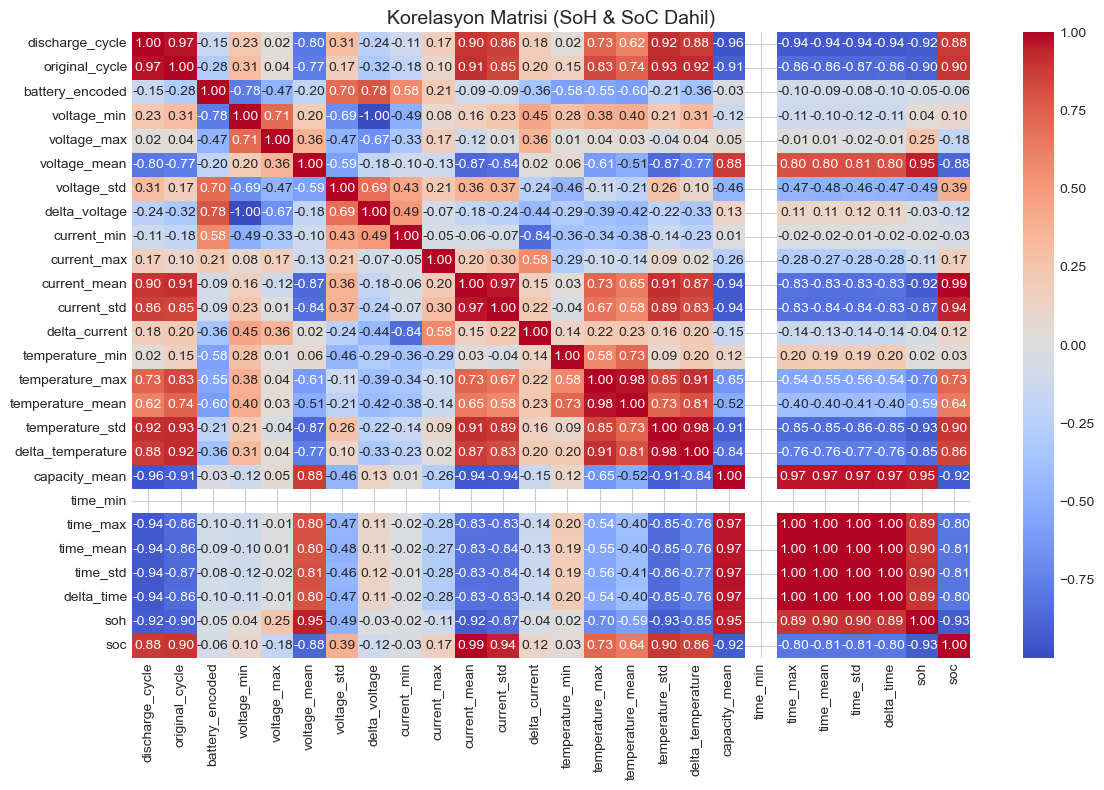

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns

# Korelasyon matrisini oluştur
corr = df_cycle_summary.corr(numeric_only=True)

# Görselleştir
plt.figure(figsize=(12, 8))
sns.heatmap(corr, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Korelasyon Matrisi (SoH & SoC Dahil)", fontsize=14)
plt.tight_layout()
plt.savefig("../eda_outputs/soh_soc_correlation_heatmap.png")
plt.show()

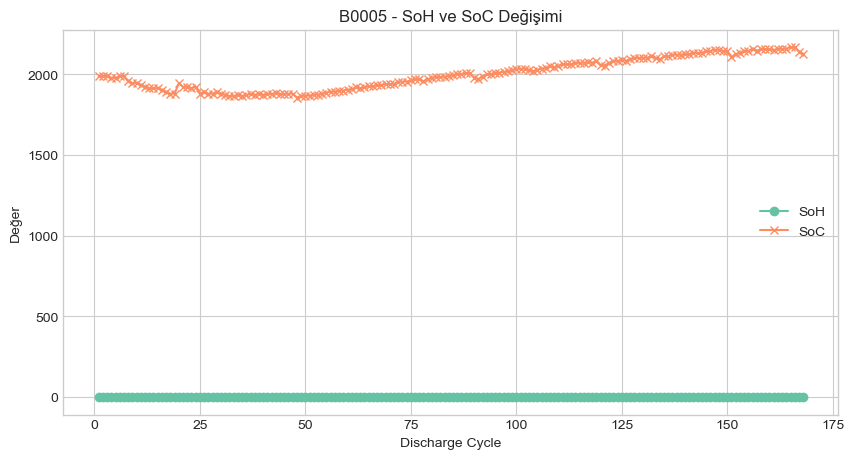

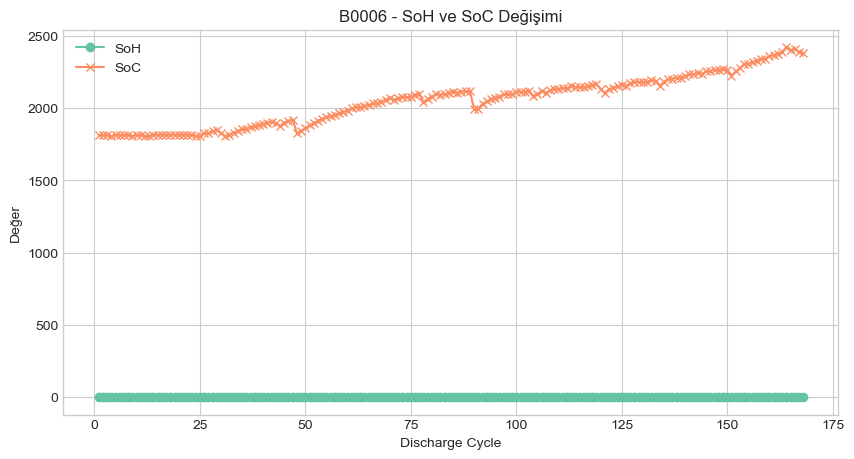

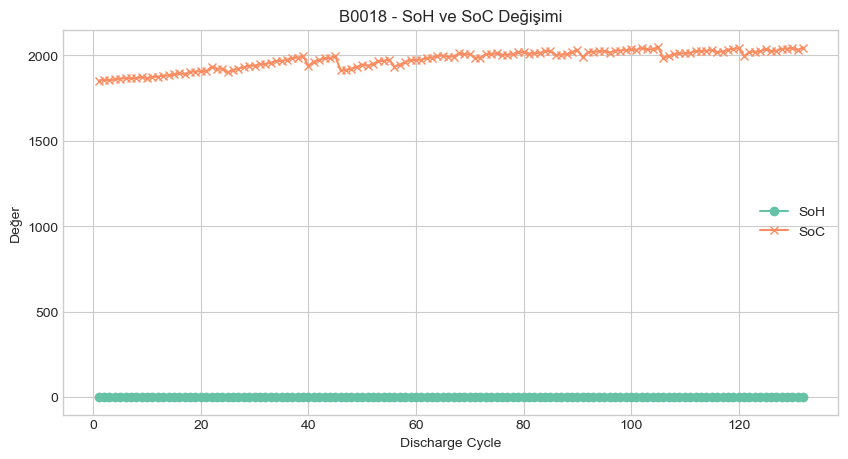

In [19]:
batteries = df_cycle_summary["battery"].unique()

for battery in batteries:
    df_b = df_cycle_summary[df_cycle_summary["battery"] == battery]

    plt.figure(figsize=(10, 5))
    plt.plot(df_b["discharge_cycle"], df_b["soh"], label="SoH", marker='o')
    plt.plot(df_b["discharge_cycle"], df_b["soc"], label="SoC", marker='x')
    plt.title(f"{battery} - SoH ve SoC Değişimi")
    plt.xlabel("Discharge Cycle")
    plt.ylabel("Değer")
    plt.legend()
    plt.grid(True)
    plt.savefig(f"../eda_outputs/{battery}_soh_soc_trend.png")
    plt.show()


In [20]:
# Korelasyonları al
corr_with_soh = corr["soh"].sort_values(ascending=False)
corr_with_soc = corr["soc"].sort_values(ascending=False)

print("SoH ile Korelasyon:\n", corr_with_soh, "\n")
print("SoC ile Korelasyon:\n", corr_with_soc)

SoH ile Korelasyon:
 soh                  1.000000
voltage_mean         0.951148
capacity_mean        0.948643
time_std             0.898538
time_mean            0.896241
time_max             0.893596
delta_time           0.893596
voltage_max          0.254320
voltage_min          0.039291
temperature_min      0.015367
current_min         -0.018061
delta_voltage       -0.025185
delta_current       -0.043747
battery_encoded     -0.051250
current_max         -0.108861
voltage_std         -0.490754
temperature_mean    -0.585955
temperature_max     -0.701431
delta_temperature   -0.853982
current_std         -0.869060
original_cycle      -0.902096
current_mean        -0.922633
discharge_cycle     -0.924773
temperature_std     -0.926730
soc                 -0.926888
time_min                  NaN
Name: soh, dtype: float64 

SoC ile Korelasyon:
 soc                  1.000000
current_mean         0.994197
current_std          0.938577
original_cycle       0.896799
temperature_std      0.895319


In [21]:
selected_features = []
feature_groups = {
    "voltage": ["voltage_min", "voltage_max", "voltage_mean", "voltage_std", "delta_voltage"],
    "current": ["current_min", "current_max", "current_mean", "current_std", "delta_current"],
    "temperature": ["temperature_min", "temperature_max", "temperature_mean", "temperature_std", "delta_temperature"],
    "time": ["time_min", "time_mean", "time_std", "delta_time"]
}

# SoH ile korelasyonları hesapla
corr = df_cycle_summary.corr(numeric_only=True)["soh"]

for group_name, cols in feature_groups.items():
    corr_subset = corr[cols].abs()
    best_col = corr_subset.idxmax()
    selected_features.append(best_col)

# Diğer önemli ama gruplanmamış sütunları da ekle
selected_features += ["original_cycle","capacity_mean", "battery_encoded", "discharge_cycle", "soh", "time_max"]

# Yeni sadeleştirilmiş veri
df_ica_ready = df_cycle_summary[selected_features]

# Kontrol
print("Seçilen sütunlar:", selected_features)
df_ica_ready.head()


Seçilen sütunlar: ['voltage_mean', 'current_mean', 'temperature_std', 'time_std', 'original_cycle', 'capacity_mean', 'battery_encoded', 'discharge_cycle', 'soh', 'time_max']


,voltage_mean,current_mean,temperature_std,time_std,original_cycle,capacity_mean,battery_encoded,discharge_cycle,soh,time_max
0,3.529829,-1.818702,3.495804,1069.272600,1,1.856487,0,1,1.000000,3690.234
1,3.537320,-1.817560,3.435509,1064.170526,3,1.846327,0,2,0.994527,3672.344
2,3.543737,-1.816487,3.388174,1058.412389,5,1.835349,0,3,0.988614,3651.641
3,3.543666,-1.825589,3.395306,1052.810986,7,1.835263,0,4,0.988567,3631.563
4,3.542343,-1.826114,3.404667,1052.107062,9,1.834646,0,5,0.988235,3629.172


In [22]:
# ICA/EMD öncesi final dataset'i kaydet
df_ica_ready.to_csv("../data/3-feature_engineered/ica_ready_dataset.csv", index=False)
print("ICA/EMD için hazır veri başarıyla kaydedildi.")

ICA/EMD için hazır veri başarıyla kaydedildi.


### SoH (State of Health) ve SoC (State of Charge) Hesaplaması

- **SoH (State of Health)**, her batarya için zamanla kapasite kaybını izlemek amacıyla hesaplanır. İlk döngüdeki kapasite referans alınarak (C-rated), her döngüdeki kapasite ortalamasına oranlanır:  
  `SoH = capacity_mean / initial_capacity`

- **SoC (State of Charge)** ise bataryanın enerji doluluğunu yansıtır ve ilgili döngüdeki boşalma süresiyle orantılı olarak tahmin edilir:  
  `SoC = time_max / capacity_mean`

Bu metrikler, bataryanın ömrünü ve anlık doluluğunu izleyebilmek için temel göstergelerdir. Modellemelerde hedef değişken olarak kullanılabilir.


Neden SoC'u ICA/EMD veri setine dahil etmedik?

- ICA/EMD öncesi veri setinde hedef değişkenimiz yalnızca SoH.
- SoC bir hedef değişken değil, ICA analizinde biz genelde bataryanın sağlığını (SoH) öngörmeye çalışırız.

SoC zaten anlık doluluk oranı olduğundan, doğrudan voltage/capacity/time gibi değişkenlerden **anlık türetilir**. Öğrenilmesi gereken bir şey değildir, zaten gözlemlenebilir.

